#### How to handle categorical missing values

#### Frequent Category Imputation

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/axagrawal/Desktop/Kaggle/loan/train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [2]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [3]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [4]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

## Compute the frequency with every feature

In [5]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:>

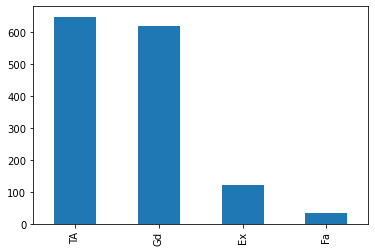

In [6]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:xlabel='BsmtQual'>

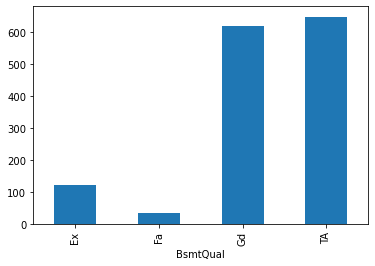

In [7]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

<AxesSubplot:xlabel='BsmtQual'>

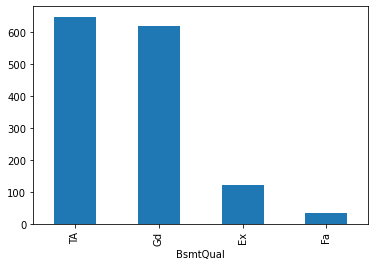

In [8]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = False).plot.bar()

<AxesSubplot:>

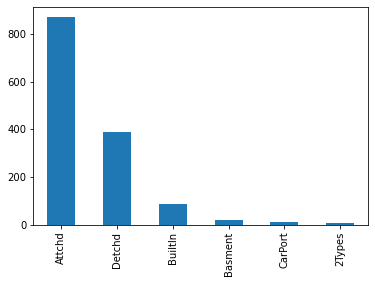

In [9]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

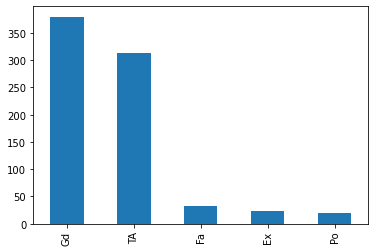

In [10]:
df['FireplaceQu'].value_counts().plot.bar()

In [11]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [12]:
df['GarageType'].value_counts()[0]

870

In [13]:
df['GarageType'].value_counts().index

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [14]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [23]:
df['GarageType'].mode()[0]

'Attchd'

In [24]:
#### Replacing function

def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace = True) 

In [25]:
#### Replacing function

def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace = True) 

In [26]:
impute_nan(df, 'GarageType')

In [27]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [28]:
### create a loop for all the features to fill NA with most frequent records

for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [29]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [30]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Advantages

1. Easy to implement.
2. Faster way to implement

### Disadvantages

1. Since we are using the more frequent labels, it may use them in an over represented way, if there are many NAN's.
2. It distorts the relation of the most frequent labels

#### Adding a variable to capture NAN

In [63]:
import pandas as pd
df = pd.read_csv('C:/Users/axagrawal/Desktop/Kaggle/loan/train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [64]:
##Adding a variable with respect to the features
import numpy as np
df['BsmtQual_New']=np.where(df['BsmtQual'].isnull(),1,0)

In [65]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_New
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [66]:
frequent = df['BsmtQual'].mode()[0]
frequent

'TA'

In [67]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [68]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_New
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [69]:
df['FireplaceQu_New']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [70]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_New,FireplaceQu_New
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### Suppose if you have more frequent categories, we just replace NAN with a new category

In [71]:
import pandas as pd
df = pd.read_csv('C:/Users/axagrawal/Desktop/Kaggle/loan/train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [72]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [73]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [74]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [80]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [81]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


##### Handle Categorical Features

##### One Hot Encoding

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/axagrawal/Desktop/Kaggle/Titanic/train.csv')

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df = pd.read_csv('C:/Users/axagrawal/Desktop/Kaggle/Titanic/train.csv',usecols=['Sex'])

In [7]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [9]:
## Lets do one hot encoding.There is a function called get_dummies()

pd.get_dummies(df)

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [10]:
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [12]:
## To drop first column or feature
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [13]:
df = pd.read_csv('C:/Users/axagrawal/Desktop/Kaggle/Titanic/train.csv',usecols=['Embarked'])

In [14]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [27]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [28]:
## Drop nan value

df.dropna(inplace = True)

In [29]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [30]:
pd.get_dummies(df,drop_first = False).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [31]:
pd.get_dummies(df,drop_first = True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


#### Disadvantages : One Hot Encoding Create more features

In [3]:
### How to perform One Hot Encoding with many categories in a feature
import pandas as pd
df = pd.read_csv('C:/Users/axagrawal/Desktop/Mercerdez/train.csv')

In [4]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df = pd.read_csv('C:/Users/axagrawal/Desktop/Mercerdez/train.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [6]:
for i in df.columns:
    print(df[i].value_counts())

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
am     18
aq     18
i      18
u      17
l      16
aw     16
ad     14
au     11
b      11
k      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
g       1
ac      1
ab      1
Name: X0, dtype: int64
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
q       3
ab      3
d       3
Name: X1, dtype: int64
as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
z       19
ag   

In [7]:
##OR You can write
df['X1'].value_counts()

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
q       3
ab      3
d       3
Name: X1, dtype: int64

In [8]:
##OR You can write for top 10
df['X1'].value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [37]:
df['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [39]:
len(df['X0'].unique())

47

In [41]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [9]:
##OR You can write for top 10 index
df['X1'].value_counts().sort_values(ascending=False).head(10).index

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [10]:
lst_10=df['X1'].value_counts().sort_values(ascending=False).head(10).index

In [11]:
lst_10

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [12]:
lst_10=list(lst_10)

In [13]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [14]:
import numpy as np
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [16]:
df['X1']

0       v
1       t
2       w
3       t
4       v
       ..
4204    s
4205    o
4206    v
4207    r
4208    r
Name: X1, Length: 4209, dtype: object

In [17]:
lst_10.append('X1')

In [18]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o', 'X1']

In [19]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


### Oridinal number encoding

#### Example of ordinal - Grading System--A,B,C,D,F and you can rank them A=1,B=2,C=3,D=4,F=5
#### Example - Experience of A Batsman
A--10 years - 1
B--5 Years -2
c--3 Years -3
#### Mon, Tues, Wed,Thur,Fri,Sat,Sun..Everyone likes sunday - 1 (Rank), Sat - 2(Rank) and so on

In [1]:
import datetime

In [2]:
today_date=datetime.datetime.today()

In [3]:
today_date

datetime.datetime(2021, 5, 31, 20, 13, 49, 645559)

In [5]:
today_date-datetime.timedelta(1)

datetime.datetime(2021, 5, 30, 20, 13, 49, 645559)

In [6]:
today_date-datetime.timedelta(2)

datetime.datetime(2021, 5, 29, 20, 13, 49, 645559)

In [9]:
#### List Comprehension
days = [today_date-datetime.timedelta(x) for x in range(0,15)]

In [12]:
### convert days into dataframe

import pandas as pd
data=pd.DataFrame(days)


In [13]:
data.columns=["Day"]

In [14]:
data.head()

,Day
0,2021-05-31 20:13:49.645559
1,2021-05-30 20:13:49.645559
2,2021-05-29 20:13:49.645559
3,2021-05-28 20:13:49.645559
4,2021-05-27 20:13:49.645559


In [29]:
data['Weekday']= data['Day'].dt.day_name()

In [30]:
data.head()

,Day,Weekday
0,2021-05-31 20:13:49.645559,Monday
1,2021-05-30 20:13:49.645559,Sunday
2,2021-05-29 20:13:49.645559,Saturday
3,2021-05-28 20:13:49.645559,Friday
4,2021-05-27 20:13:49.645559,Thursday


In [31]:
dictionary={"Monday":1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [32]:
dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [34]:
data['Weekday_ordinal']=data['Weekday'].map(dictionary)

In [35]:
data

,Day,Weekday,Weekday_ordinal
0,2021-05-31 20:13:49.645559,Monday,1
1,2021-05-30 20:13:49.645559,Sunday,7
2,2021-05-29 20:13:49.645559,Saturday,6
3,2021-05-28 20:13:49.645559,Friday,5
4,2021-05-27 20:13:49.645559,Thursday,4
5,2021-05-26 20:13:49.645559,Wednesday,3
6,2021-05-25 20:13:49.645559,Tuesday,2
7,2021-05-24 20:13:49.645559,Monday,1
8,2021-05-23 20:13:49.645559,Sunday,7
9,2021-05-22 20:13:49.645559,Saturday,6


#### Count or Frequency Encoding

In [4]:
import pandas as pd
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, index_col = None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
train_set[1].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [8]:
len(train_set[1].unique())

9

In [9]:
columns=[1,3,5,6,7,8,9,13]

In [12]:
train_set=train_set[columns]

In [13]:
train_set.columns=['Employment','Degree','Status','Designation','Family_Job','Race','Sex','Country']

In [14]:
train_set.head()

,Employment,Degree,Status,Designation,Family_Job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [15]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
Family_Job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [16]:
train_set['Country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [17]:
train_set['Country'].value_counts().to_dict()

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Trinadad&Tobago': 19,
 ' Cambodia': 19,
 ' Thailand': 18,
 ' Laos': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Hungary': 13,
 ' Honduras': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [19]:
country_map = train_set['Country'].value_counts().to_dict()

In [20]:
train_set['Country']=train_set['Country'].map(country_map)

<ipython-input-20-702212cebb55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Country']=train_set['Country'].map(country_map)


In [21]:
train_set.head()



,Employment,Degree,Status,Designation,Family_Job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


#### Advantages
1. Easy to Use.
2. Not increaing any feature space

#### Disadvantages
1. It will provide same weight if the frequencies are same. It will not be able to handle.Model will not able to detect.

### Target Guided Ordinal Encoding

1. Ordering the labels according to the target.
2. Replace the labels by the joint probability of being 1 or 0

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/axagrawal/Desktop/Kaggle/Titanic/train.csv', usecols=["Cabin", "Survived"])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [3]:
df["Cabin"].fillna("Missing", inplace = True)

In [5]:
df.head(10)

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
5,0,Missing
6,0,E46
7,0,Missing
8,1,Missing
9,1,Missing


In [7]:
df["Cabin"] = df["Cabin"].astype(str).str[0]

In [8]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [9]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [10]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [11]:
df.groupby(['Cabin'])['Survived'].mean().sort_values()

Cabin
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [12]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [13]:
ordinal_labels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [15]:
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [16]:
enumerate(ordinal_labels,0)

In [18]:
ordinal_labels2 = {k:i for i, k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [19]:
df["Cabin_ordinal_labels"]=df["Cabin"].map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


### Mean Encoding

In [20]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [25]:
### For A it will get replaced with it's mean value 0.4666 and so on
df.groupby(['Cabin'])['Survived'].mean().to_dict()

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [26]:
mean_ordinal = df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [27]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [28]:
df["mean_ordinal_encode"]=df["Cabin"].map(mean_ordinal)

In [29]:
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


### Disadvantages

1. It leads to Overfitting

### Advantages
1. It captures information with in a labels therefore rendering more predective features.
2. It creates a monotonic relationship between variable and targets.

### Probability Ratio Encoding 

1. Probability of Survived based on Cabin ------Categorical Feature
2. Probability of Not Survived----1-pr(Survived)
3. pr(Survived)/ pr(Not Survived)
4. Create a dictionary to map cabin with probability
5. Replace with the Categorical Feature

In [23]:
import pandas as pd
df = pd.read_csv('C:/Users/axagrawal/Desktop/Kaggle/Titanic/train.csv', usecols=["Cabin", "Survived"])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [24]:
df['Cabin'].fillna('Missing', inplace = True)

In [25]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [26]:
df.head(20)

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
5,0,Missing
6,0,E46
7,0,Missing
8,1,Missing
9,1,Missing


In [27]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [28]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [29]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [30]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [31]:
df.groupby(["Cabin"])["Survived"].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [32]:
prob_df = df.groupby(["Cabin"])["Survived"].mean()

In [33]:
prob_df=pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [34]:
prob_df['Died']=1-prob_df['Survived']

In [35]:
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [36]:
prob_df['Probability_ratio']=prob_df['Survived']/prob_df['Died']

In [37]:
prob_df.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [38]:
### Convert Probability_ratio into dictionary

prob_df["Probability_ratio"].to_dict()

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [39]:
probability_encoded=prob_df["Probability_ratio"].to_dict()

In [40]:
df["Cabin_encoded"]=df["Cabin"].map(probability_encoded)

In [41]:
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


In [42]:
df.head(20)

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
5,0,M,0.428274
6,0,E,3.000000
7,0,M,0.428274
8,1,M,0.428274
9,1,M,0.428274


In [43]:
df = df.drop(['Cabin'],axis=1)

In [44]:
df.head()

,Survived,Cabin_encoded
0,0,0.428274
1,1,1.458333
2,1,0.428274
3,1,1.458333
4,0,0.428274
